<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Agent and Multi-Agent Systems </center>
    <center> PW2 : Multi-Agent Based Simulation</center>
<hr style=" border:none; height:3px;">
</h1>

As we have seen, simulation creates a digital environment that looks like an artificial laboratory where we can test hypotheses, prospective scenarios or simply the evolution of the system in the future.

As with any laboratory experiment, it is necessary to be able to follow the evolution of the experiments: with Multi-Agent based Simulation, it is necessary to visualize the evolution of the simulation and to collect data.

The visualization of the simulation is very important in the context of Multi-Agent based Simulation because the simple and localized rules that allow to reproduce complex and global behaviors of the system are also responsible of the emergence of many phenomena. You can have an example on the emergence capabilities of multi-agent systems at this [address](https://medium.com/scalian/dynamiques-locales-cons%C3%A9quences-globales-97a2ef44ba58)

In what follows, we will present the two features of Mesa that make it possible to make **data collection** and **visualization**.

## Part1: Tutorial - Visualizing Multi-Agent Based Simulation

### 1. Collecting Data

Mesa provides a class which can handle data collection and storage at runtime, which avoids to manipulates tables or dictionaries manually in the model. All this is done via the `DataCollector` class:

In [ ]:
!pip install mesa

In [ ]:
# To execute
from mesa.datacollection import DataCollector

The data collector stores three categories of data: *model-level* variables, *agent-level* variables, and *tables* (which are a catch-all for everything else). Model- and agent-level variables are added to the data collector along with a function for collecting them. Model-level collection functions take a model object as an input, while agent-level collection functions take an agent object as an input. Both then return a value computed from the model or each agent at their current state.

When the data collector’s `collect` method is called, with a model object as its argument, it applies each model-level collection function to the model, and stores the results in a dictionary, associating the current value with the current step of the model. Similarly, the method applies each agent-level collection function to each agent currently in the schedule, associating the resulting value with the step of the model, and the agent’s `unique_id`.

Let’s start from the previous example: the Money Model.

#### Agent-level

First, let us consider an agent-level variable. Imagine we want to store the value of each agent’s wealth at each time step. We must add in the `MoneyModel` constructor a `DataCollector` with the parameter `agent_reporters` set to a dictionary that associates the label of the data and the name of the collected variable:

In [ ]:
#Do not execute
self.datacollector = DataCollector(agent_reporters={"Wealth": "wealth"})

We now simply tell the model to collect data with

In [ ]:
#Do not execute
self.datacollector.collect(self)

each time we want to store values (e.g. right before or after we call `self.schedule.step()`).

Once the execution is finished, we can retrieve the data with:

In [ ]:
#Do not execute
model.datacollector.get_agent_vars_dataframe()

The result is a Pandas `DataFrame`. See the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) for more information. You might also want to refer to the [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for information about Pandas’ data visualization.

<div class="alert alert-block alert-info">

 <b>Questions</b>
    
- Updatethe MoneyModel code by adding the data collector
</div>

In [ ]:
from mesa.datacollection import DataCollector

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        #To complete

    def move(self):
        #To complete

    def give_money(self):
        #To complete

    def step(self):
        #To complete

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        super().__init__()
        #TO COMPLETE

        # Create agents
          #To COMPLETE

        # Adding datacollector
           #To COMPLETE

    def step(self):
        #TO COMPLETE
        self.schedule.step()



In [ ]:
# Run the simulation
model = MoneyModel(50, 10, 10)  # 50 agents in our example
for i in range(100):
    model.step()


In [ ]:
#we can get the agent-wealth data:

agent_wealth = #To COMPELET
agent_wealth.head()

#An example is below

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

#### Model-level

It is also possible to use functions in the collector. For example, assume we want to collect the value of the [Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient), a measure of wealth inequality, at each time step on the model. Let’s define the `compute_gini` method:

In [ ]:
#Do not execute
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i, xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)

Now, we can collect this data at runtime using the `DataCollector` with the parameter `model_reporters` set to a dictionary that associates the label of the data and the above function:

In [ ]:
#Do not execute
self.datacollector = DataCollector(
    model_reporters={"Gini": compute_gini},
    agent_reporters={"Wealth": "wealth"})

#Note that we still collect the agents’ wealth values.

<div class="alert alert-block alert-info">

 <b>Question</b>
    
Update your code  to take into account the Gini Coefficient and visualize its evolution in the simulation (you need to collect the Gini values).

What do you observe ?

</div>

In [ ]:
#Answer

from mesa.datacollection import DataCollector

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid


def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)


#TO COMPLETE

In [ ]:
# Plot the Gini coefficient over time
import seaborn as sns
gini = #TO COMPLETE

g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");

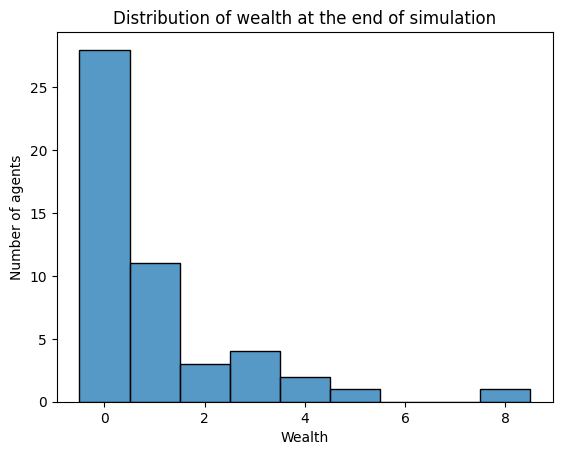

In [ ]:
#You can use the following to get a histogram of agent wealth at the model’s end:

agent_wealth = model.datacollector.get_agent_vars_dataframe()
#agent_wealth.head()

last_step = agent_wealth.index.get_level_values("Step").max()
end_wealth = agent_wealth.xs(last_step, level="Step")["Wealth"]

# Create a histogram of wealth at the last step
g = sns.histplot(end_wealth, discrete=True)
g.set(
    title="Distribution of wealth at the end of simulation",
    xlabel="Wealth",
    ylabel="Number of agents",
);

#An example of the output is the following

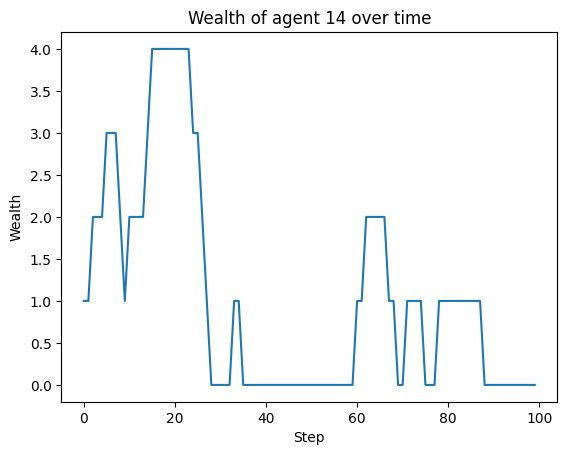

In [ ]:
# Get the wealth of agent 14 over time
one_agent_wealth = agent_wealth.xs(14, level="AgentID")

# Plot the wealth of agent 14 over time
g = sns.lineplot(data=one_agent_wealth, x="Step", y="Wealth")
g.set(title="Wealth of agent 14 over time");

<div class="alert alert-block alert-info">

 <b>Question</b>
    
Try to get the wealth of multiple agents over time.

</div>

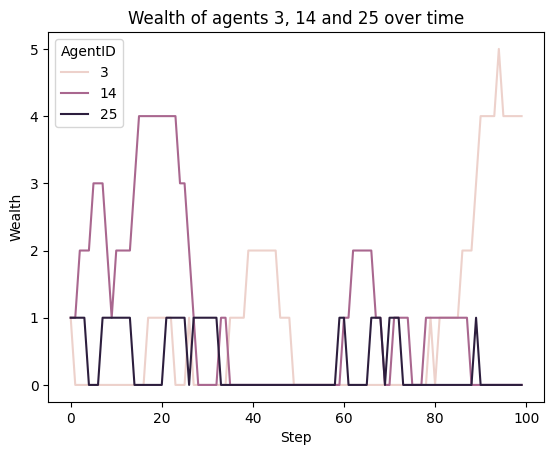

In [ ]:
agent_list = [3, 14, 25]

# Get the wealth of multiple agents over time
multiple_agents_wealth = #TO COMPLETE

# Plot the wealth of multiple agents over time
g = sns.lineplot(data=multiple_agents_wealth, x="Step", y="Wealth", hue="AgentID")
g.set(title="Wealth of agents 3, 14 and 25 over time");

#Example below

### Ressources:  



*   https://pandas.pydata.org/docs/user_guide/reshaping.html
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack



[Text(0.5, 1.0, 'Average wealth over time')]

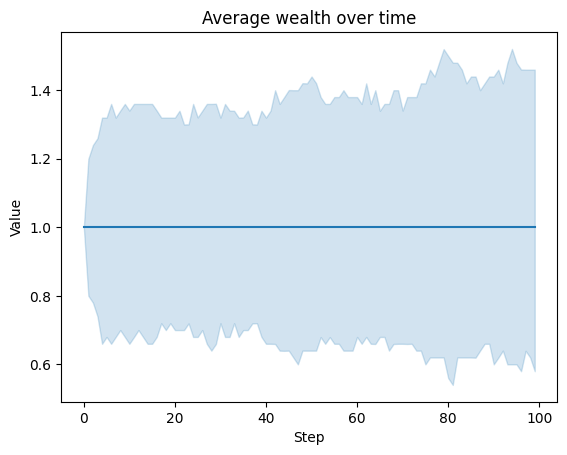

In [ ]:
# Plot the average wealth over time

# First we transform the data to a long format
agent_wealth_long = agent_wealth.T.unstack().reset_index()
agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"]
agent_wealth_long.head(3)


g = sns.lineplot(data=agent_wealth_long, x="Step", y="Value", errorbar=("ci", 95))
g.set(title="Average wealth over time")

Which is exactly 1, as expected in this model, since each agent starts with one wealth unit, and each agent gives one wealth unit to another agent at each step.

### Additional agent reporter

To make the results a little bit more interesting, we will also calculate the number of consecutive time steps an agent hasn’t given any wealth as an agent reporter.

This way we can see how data is handled when multiple reporters are used.



<div class="alert alert-block alert-info">

 <b>Question</b>
    
Modify your previous code (MoneyModel) to calculate the number of consective time steps an agent hasn’t given any wealth

</div>

In [ ]:
#Answer

#TO COMPLETE

# Batch Run

You usually won’t run a model only once, but multiple times, with fixed parameters to find the overall distributions the model generates, and with varying parameters to analyze how they drive the model’s outputs and behaviors. Instead of needing to write nested for-loops for each model, Mesa provides a  `batch_run` function which automates it for you.

The batch runner also requires an additional variable `self.running` for the MoneyModel class. This variable enables conditional shut off of the model once a condition is met.

We call `batch_run` with the following arguments:



*   `model_cls` The model class that is used for the batch run.
*  `parameters` A dictionary containing all the parameters of the model class and desired values to use for the batch run as key-value pairs. Each value can either be fixed ( e.g. `{"height": 10, "width": 10}`) or an iterable (e.g. `{"N": range(10, 500, 10)}`). `batch_run` will then generate all possible parameter combinations based on this dictionary and run the model iterations times for each combination.
* `number_processes` If not specified, defaults to 1. Set it to None to use all the available processors. Note: Multiprocessing does make debugging challenging. If your parameter sweeps are resulting in unexpected errors set number_processes=1.
* `iterations` The number of iterations to run each parameter combination for. Optional. If not specified, defaults to 1.
*`data_collection_period` The length of the period (number of steps) after which the model and agent reporters collect data. Optional. If not specified, defaults to -1, i.e. only at the end of each episode.
*`max_steps` The maximum number of time steps after which the model halts. An episode does either end when `self.running` of the model class is set to False or when `model.schedule.steps == max_steps` is reached. Optional. If not specified, defaults to 1000.
*`display_progress` Display the batch run progress. Optional. If not specified, defaults to True.


In the following example, we hold the height and width fixed, and vary the number of agents. We tell the batch runner to run 5 instantiations of the model with each number of agents, and to run each for 100 steps.

We want to keep track of

1. the Gini coefficient value at each time step, and
2. the individual agent’s wealth development and steps without giving money.


Important: Since for the latter changes at each time step might be interesting, we set `data_collection_period=1`. By default, it only collects data at the end of each episode.

Note: The total number of runs is 245 (= 49 different populations * 5 iterations per population). However, the resulting list of dictionaries will be of length 6186250 (= 250 average agents per population * 49 different populations * 5 iterations per population * 101 steps per iteration).

**Note for Windows OS users**: If you are running this tutorial in Jupyter, make sure that you set number_processes = 1 (single process). If number_processes is greater than 1, it is less straightforward to set up. You can read Mesa’s how-to guide, in ‘Using multi-process batch_run on Windows’ section for how to do it.



In [ ]:
import mesa
params = {"width": 10, "height": 10, "N": range(5, 100, 5)} # range(start, stop, step)

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=7,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

  0%|          | 0/133 [00:00<?, ?it/s]

<div class="alert alert-block alert-info">

 <b>Question</b>
    
To further analyze the return of the batch_run function, convert the list of dictionaries to a Pandas DataFrame and print its keys.

</div>



In [ ]:
import pandas as pd
results_df = #TO COMPELTE

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'Gini', 'AgentID',
       'Wealth', 'Steps_not_given'],
      dtype='object')


First, we want to take a closer look at how the Gini coefficient at the end of each episode changes as we increase the size of the population. For this, we filter our results to only contain the data of one agent (the Gini coefficient will be the same for the entire population at any time) at the 100th step of each episode and then scatter-plot the values for the Gini coefficient over the the number of agents. Notice there are five values for each population size since we set iterations=5 when calling the batch run.

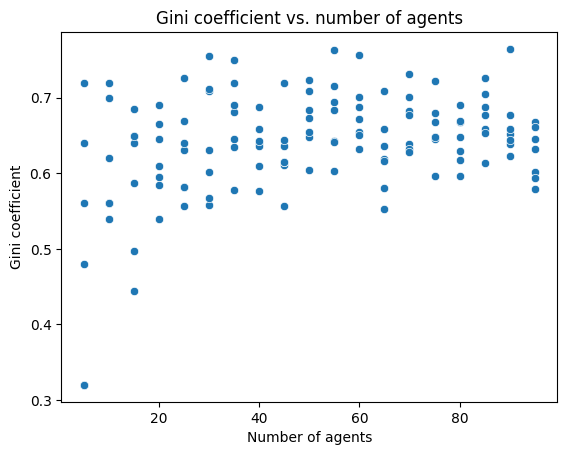

In [ ]:
# Filter the results to only contain the data of one agent (the Gini coefficient will be the same for the entire population at any time) at the 100th step of each episode


results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 100)]
results_filtered[["iteration", "N", "Gini"]].reset_index(drop=True).head()


# Create a scatter plot
g = sns.scatterplot(data=results_filtered, x="N", y="Gini")
g.set(
    xlabel="Number of agents",
    ylabel="Gini coefficient",
    title="Gini coefficient vs. number of agents",
);


<div class="alert alert-block alert-info">

 <b>Question</b>
    
We can create different kinds of plot from this filtered DataFrame. For example, a point plot with error bars.

</div>



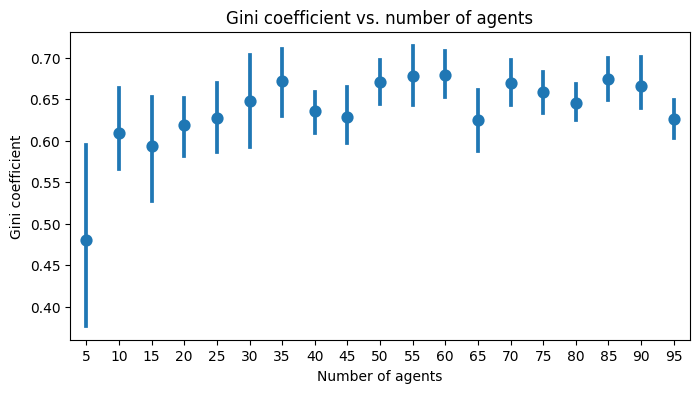

In [ ]:
# Create a point plot with error bars

g = #TO COMPELETE


g.figure.set_size_inches(8, 4)
g.set(
    xlabel="Number of agents",
    ylabel="Gini coefficient",
    title="Gini coefficient vs. number of agents",
);

#An example is below

Second, we want to display the agent’s wealth at each time step of one specific episode.

To do this, we again filter our large data frame, this time with a fixed number of agents and only for a specific iteration of that population. To print the results, we convert the filtered data frame to a string specifying the desired columns to print.

Pandas has built-in functions to convert to a lot of different data formats.

For example, to display as a table in a Jupyter Notebook, we can use the `to_html()` function which takes the same arguments as `to_string() (see commented lines).

In [ ]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 2)]

# Then, print the columns of interest of the filtered data frame
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=10
    )
)
# For a prettier display we can also convert the data frame to html, uncomment to test in a Jupyter Notebook
# from IPython.display import display, HTML
# display(HTML(one_episode_wealth.to_html(index=False, columns=['Step', 'AgentID', 'Wealth'], max_rows=25)))

 Step  AgentID  Wealth
    0        0       1
    0        1       1
    0        2       1
    0        3       1
    0        4       1
  ...      ...     ...
  100        2       2
  100        4       1
  100        6       3
  100        7       1
  100        1       0





<div class="alert alert-block alert-info">

 <b>Question</b>
    
Lastly, we want to take a look at the development of the Gini coefficient over the course of one iteration. Filtering and printing looks almost the same as above, only this time we choose a different episode.

</div>



In [ ]:
results_one_episode = #TO COMPLETE
]
print(#TO COMPLETE)

#An exampel is belows

 Step  Gini
    0   0.0
    1   0.0
    2   0.0
    3   0.0
    4   0.0
  ...   ...
   96   0.7
   97   0.7
   98   0.7
   99   0.7
  100   0.7


### Analyzing model reporters: Comparing 5 scenarios

Other insight might be gathered when we compare the Gini coefficient of different scenarios.

For example, we can compare the Gini coefficient of a population with 25 agents to the Gini coefficient of a population with 400 agents. While doing this, we increase the number of iterations to 25 to get a better estimate of the Gini coefficient for each population size and get usable error estimations.

In [ ]:
params = {"width": 10, "height": 10, "N": [5, 10, 20, 40, 80]}

results_5s = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=100,
    max_steps=120,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)

results_5s_df = pd.DataFrame(results_5s)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# Again filter the results to only contain the data of one agent (the Gini coefficient will be the same for the entire population at any time)
results_5s_df_filtered = results_5s_df[(results_5s_df.AgentID == 0)]
results_5s_df_filtered.head(3)

RunId  iteration  Step  width  height  N  Gini  AgentID  Wealth  \
0       0          0     0     10      10  5   0.0        0       1   
7       0          0     1     10      10  5   0.0        0       1   
14      0          0     2     10      10  5   0.0        0       1   

    Steps_not_given  
0                 0  
7                 1  
14                2

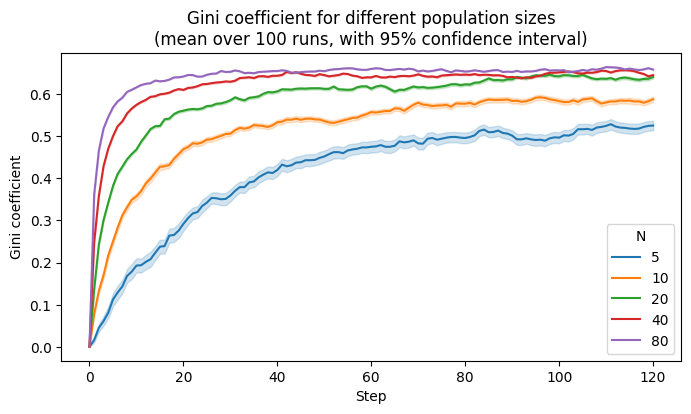

In [ ]:
# Creating a lineplot with error bars
g = sns.lineplot(
    data=results_5s_df,
    x="Step",
    y="Gini",
    hue="N",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plot_title = "Gini coefficient for different population sizes\n(mean over 100 runs, with 95% confidence interval)"
g.set(title=plot_title, ylabel="Gini coefficient");


In this case it looks like the Gini coefficient increases slower for smaller populations. This can be because of different things, either because the Gini coefficient is a measure of inequality and the smaller the population, the more likely it is that the agents are all in the same wealth class, or because there are less interactions between agents in smaller populations, which means that the wealth of an agent is less likely to change.

### Analyzing agent reporters

From the agents we can collect the wealth and the number of consecutive rounds without a transaction. We can compare the 5 different population sizes by plotting the average number of consecutive rounds without a transaction for each population size.

Note that we’re aggregating multiple times here: First we take the average of all agents for each single replication. Then we plot the averages for all replications, with the error band showing the 95% confidence interval of that first average (over all agents). So this error band is representing the uncertainty of the mean value of the number of consecutive rounds without a transaction for each population size.

In [ ]:
# Calculate the mean of the wealth and the number of consecutive rounds for all agents in each episode
agg_results_df = (
    results_5s_df.groupby(["iteration", "N", "Step"])
    .agg({"Wealth": "mean", "Steps_not_given": "mean"})
    .reset_index()
)
agg_results_df.head(3)

iteration  N  Step  Wealth  Steps_not_given
0          0  5     0     1.0              0.0
1          0  5     1     1.0              1.0
2          0  5     2     1.0              2.0

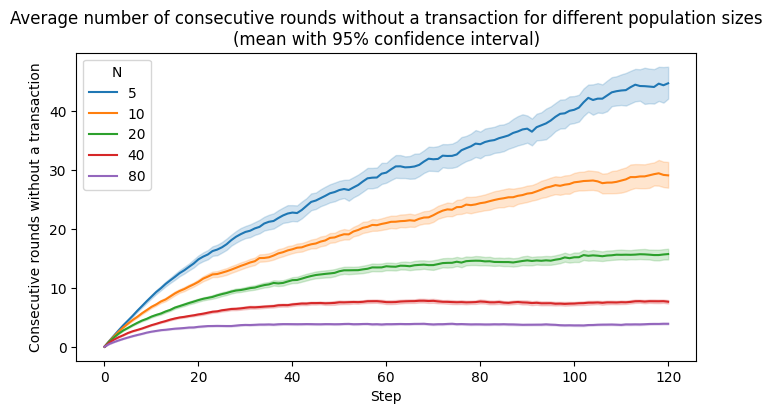

In [ ]:
# Create a line plot with error bars
g = sns.lineplot(
    data=agg_results_df, x="Step", y="Steps_not_given", hue="N", palette="tab10"
)

g.figure.set_size_inches(8, 4)
g.set(
    title="Average number of consecutive rounds without a transaction for different population sizes\n(mean with 95% confidence interval)",
    ylabel="Consecutive rounds without a transaction",
);

it can be clearly seen that the lower the number of agents, the higher the number of consecutive rounds without a transaction. This is because the agents have fewer interactions with each other and therefore the wealth of an agent is less likely to change.



# Recap: General steps for analyzing results

Many other analysis are possible based on the policies, scenarios and uncertainties that you might be interested in. In general, you can follow these steps to do your own analysis:

1. Determine which metrics you want to analyse. Add these as model and agent to the datacollector of your model.
2. Determine the input parameters you want to vary. Add these as parameters to the batch_run function, using ranges or lists to test different values.
3. Determine the hyperparameters of the batch_run function. Define the number of iterations, the number of processes, the number of steps, the data collection period, etc.
4. Run the batch_run function and save the results.
5. Transform, filter and aggregate the results to get the data you want to analyze. Make sure it’s in long format, so that each row represents a single value.
6. Choose a plot type, what to plot on the x and y axis, which columns to use for the hue. Seaborn also has an amazing Example Gallery.
7. Plot the data and analyze the results.

### 2. Dynamic visualization

So far, we’ve built a model, run it, and analyzed some output afterwards. However, one of the advantages of agent-based models is that we can often watch them run step by step, potentially spotting unexpected patterns, behaviors or bugs, or developing new intuitions, hypotheses, or insights. Other times, watching a model run can explain it to an unfamiliar audience better than static explanations. Like many ABM frameworks, Mesa allows you to create an interactive visualization of the model. In this section we’ll walk through creating a visualization using built-in components, and (for advanced users) how to create a new visualization element.

First, a quick explanation of how Mesa’s interactive visualization works. The visualization is done in a browser window, using the Solara framework, a pure Python, React-style web framework. Running solara run app.py will launch a web server, which runs the model, and displays model detail at each step via the Matplotlib plotting library. Alternatively, you can execute everything inside a Jupyter environment.




#### Grid Visualization

To start with, let’s have a visualization where we can watch the agents moving around the grid. Let us use the same `MoneyModel` created before.

Mesa’s grid visualizer works by looping over every cell in a grid, and generating a portrayal for every agent it finds. A portrayal is a dictionary (which can easily be turned into a JSON object) which tells Matplotlib the color and size of the scatterplot markers (each signifying an agent). The only thing we need to provide is a function which takes an agent, and returns a portrayal dictionary. Here’s the simplest one: it’ll draw each agent as a blue, filled circle, with a radius size of 50.

In [ ]:
#To execute
def agent_portrayal(agent):
    return {
        "color": "tab:blue",
        "size": 30,
    }

In addition to the portrayal method, we instantiate the model parameters, some of which are modifiable by user inputs. In this case, the number of agents, N, is specified as a slider of integers.

In [ ]:
#To execute
model_params = {
    "N": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

Next, we instantiate the visualization object which (by default) displays the grid containing the agents, and timeseries of of values computed by the model’s data collector. In this example, we specify the Gini coefficient.

There are 3 buttons:

* the step button, which advances the model by 1 step
* the play button, which advances the model indefinitely until it is paused, or until `model.running` is False (you may specify the stopping condition)
* the pause button, which pauses the model
To reset the model, simply change the model parameter from the user input (e.g. the “Number of agents” slider).

In [ ]:
from mesa.experimental import JupyterViz

page = JupyterViz(
    MoneyModel,
    model_params,
    measures=["Gini"],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)
# This is required to render the visualization in the Jupyter notebook page

## Changing the agents

In the visualization above, all we could see is the agents moving around – but not how much money they had, or anything else of interest. Let’s change it so that agents who are broke (wealth 0) are drawn in red, smaller. (TODO: currently, we can’t predict the drawing order of the circles, so a broke agent may be overshadowed by a wealthy agent. We should fix this by doing a hollow circle instead)

To do this, we go back to our`agent_portrayal` code and add some code to change the portrayal based on the agent properties and launch the server again.

In [ ]:
#To execute
def agent_portrayal(agent):
    size = 10
    color = "tab:red"
    if agent.wealth > 0:
        size = 50
        color = "tab:blue"
    return {"size": size, "color": color}

In [ ]:
page = JupyterViz(
    MoneyModel,
    model_params,
    measures=["Gini"],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)
# This is required to render the visualization in the Jupyter notebook page

### Building your own visualization component

If the visualization elements provided by Mesa aren’t enough for you, you can build your own and plug them into the model server.

For this example, let’s build a simple histogram visualization, which can count the number of agents with each value of wealth.

In [ ]:
import solara
from matplotlib.figure import Figure


def make_histogram(model):
    # Note: you must initialize a figure using this method instead of
    # plt.figure(), for thread safety purpose
    fig = Figure()
    ax = fig.subplots()
    wealth_vals = [agent.wealth for agent in model.schedule.agents]
    # Note: you have to use Matplotlib's OOP API instead of plt.hist
    # because plt.hist is not thread-safe.
    ax.hist(wealth_vals, bins=10)
    solara.FigureMatplotlib(fig)

Next, we reinitialize the visualization object, but this time with the histogram (see the measures argument).

In [ ]:
page = JupyterViz(
    MoneyModel,
    model_params,
    measures=["Gini", make_histogram],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)
# This is required to render the visualization in the Jupyter notebook page